Number of classes: 4
Classes: ['elephant', 'giraffe', 'lion', 'zebra']


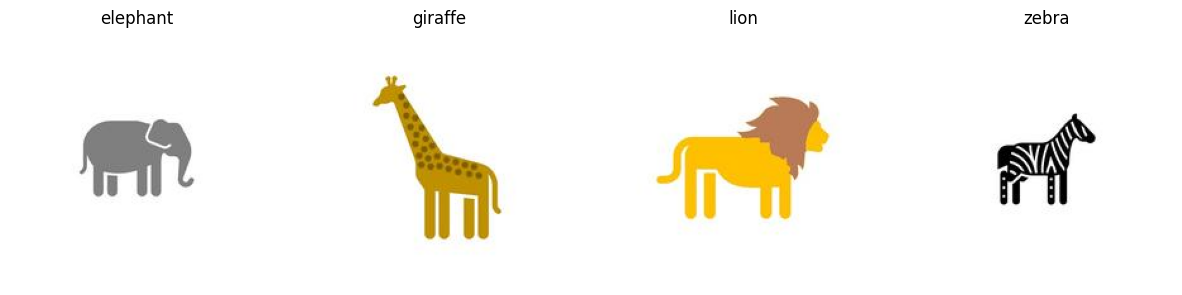

In [5]:
import os 
import sys
from matplotlib import image as mpimg
from matplotlib import pyplot as plt
import numpy as np

base_path = r'datasources\challenges\data\safari\training'
classes = os.listdir(base_path)

print(f"Number of classes: {len(classes)}")
print("Classes:", classes)

fig = plt.figure(figsize=(15, 8))

for idx, class_name in enumerate(classes):
    class_path = os.path.join(base_path, class_name)
    image_files = os.listdir(class_path)
    
    if image_files:  # Ensure the folder isn't empty
        img_path = os.path.join(class_path, image_files[0])
        img = mpimg.imread(img_path)
        
        ax = fig.add_subplot(1, len(classes), idx + 1)
        ax.set_title(class_name)
        ax.imshow(img)
        ax.axis('off')

plt.show()


In [16]:
import torch
import torchvision as tv
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize((.5,.5,.5),(.5,.5,.5))
])

train_data = datasets.ImageFolder(base_path, transform=transform)
train_loader = DataLoader(train_data, batch_size=25, shuffle=True)
print("Classes:" ,train_data.classes)

Classes: ['elephant', 'giraffe', 'lion', 'zebra']


In [29]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(.5)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x
    
model = SimpleCNN(num_classes=len(classes))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=.001)
for epoch in range (15):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs= model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 10 == 9:
            print(f"[{epoch +1}, {i +1}] loss: {running_loss /10:.3f}")
            running_loss = 0.0

[1, 10] loss: 1.120
[2, 10] loss: 0.134
[3, 10] loss: 0.018
[4, 10] loss: 0.008
[5, 10] loss: 0.004
[6, 10] loss: 0.002
[7, 10] loss: 0.002
[8, 10] loss: 0.001
[9, 10] loss: 0.001
[10, 10] loss: 0.001
[11, 10] loss: 0.001
[12, 10] loss: 0.000
[13, 10] loss: 0.001
[14, 10] loss: 0.002
[15, 10] loss: 0.001
